In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import  Pipeline
import xgboost as xgb
from catboost import CatBoostClassifier


In [10]:
# Import Training set
file_input = "train.csv"
df_train = pd.read_csv(file_input)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# import Test set
file_input = "test.csv"
df_test = pd.read_csv(file_input)

In [12]:
print(df_train.info())


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB
None


In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
# Drop PassengerID & Name from Train & Test set
df_train.drop(columns= ["PassengerId", "Name", "Ticket"], inplace= True)
df_test.drop(columns= ["PassengerId", "Name", "Ticket"], inplace= True)

In [15]:
# Count No of Passengers in Each Class
print("Training_set \n", df_train["Pclass"].value_counts())
print("Testing_set \n",df_test["Pclass"].value_counts())

Training_set 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Testing_set 
 Pclass
3    218
1    107
2     93
Name: count, dtype: int64


In [16]:
count_Cabin = df_train.groupby(["Pclass"])[["Cabin"]].agg("count").reset_index()
print("Training set if there is any relation between Pclass and Cabin \n", count_Cabin)

Training set if there is any relation between Pclass and Cabin 
    Pclass  Cabin
0       1    176
1       2     16
2       3     12


#### **Cleaning Data**

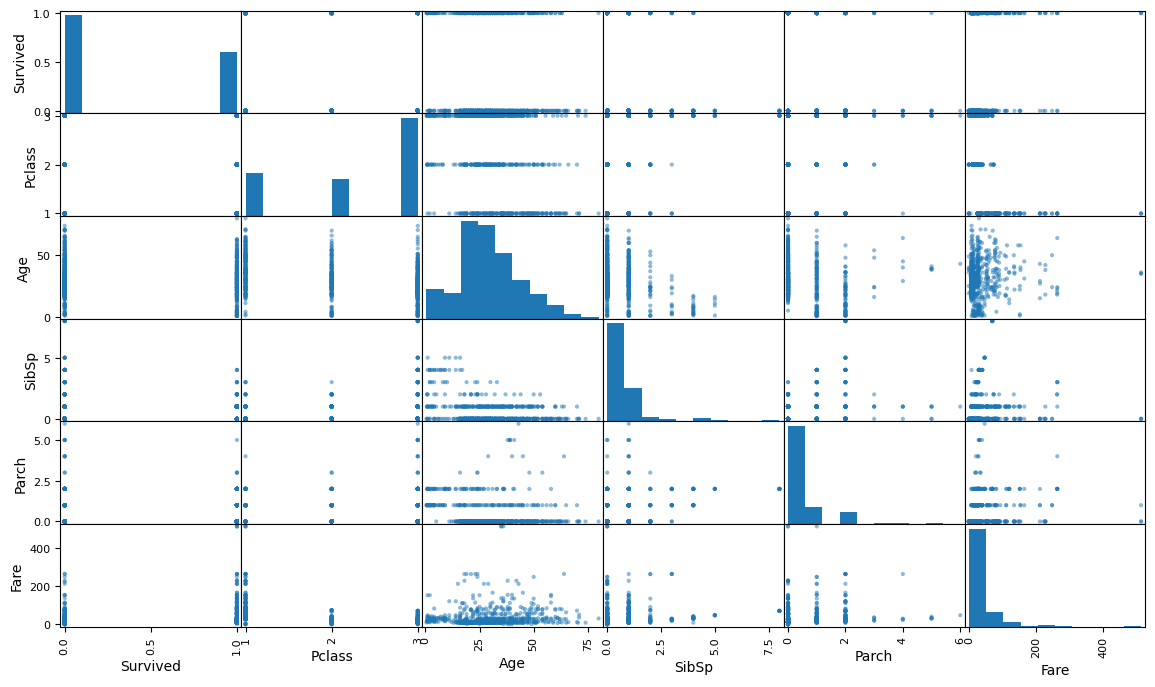

In [17]:
pd.plotting.scatter_matrix(df_train, alpha = 0.5, figsize=(14,8), diagonal='hist');

In [18]:
# Tackling  NA values
def df(df):
    df["Cabin"] = df["Cabin"].fillna("NA") # U is Unkown
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    return df
df_train_cleaned = df(df_train)
df_test_cleaned = df(df_test)

In [19]:
df_train_cleaned.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    str    
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    str    
 8   Embarked  891 non-null    str    
dtypes: float64(2), int64(4), str(3)
memory usage: 62.8 KB


#### **Correlation of Numerical Values**

Text(0.5, 1.0, 'Correlation Map of Numerical values in dataset')

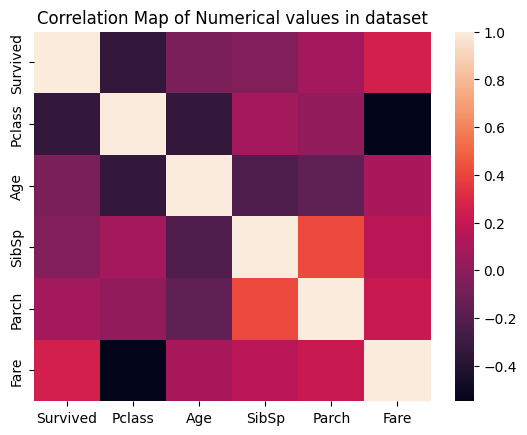

In [20]:
# Correlation Plot
correlation_value = df_train.select_dtypes(include= ['int64','float64']).corr()
sns.heatmap(data= correlation_value, fmt= '.2g' )
plt.title("Correlation Map of Numerical values in dataset")

#### **Visualtion of Features w.r.to Survival rate**

Text(0.5, 1.0, 'How many people Survived by Passenger Class')

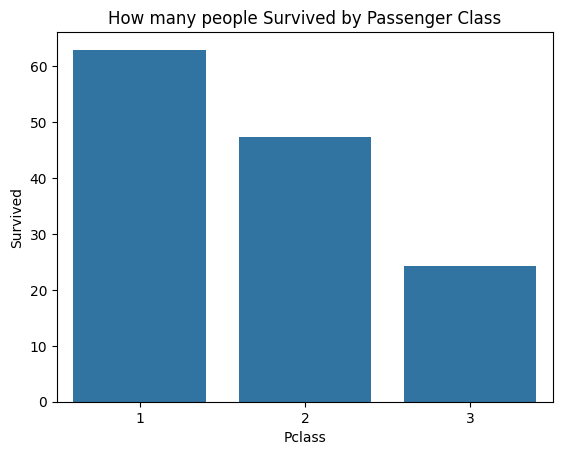

In [21]:
# How many people survived by class 
sns.barplot(data = df_train_cleaned, x = "Pclass", y = df_train_cleaned["Survived"]*100, errorbar= None)
plt.title("How many people Survived by Passenger Class")

Text(0.5, 1.0, 'How many people Survived by Sex')

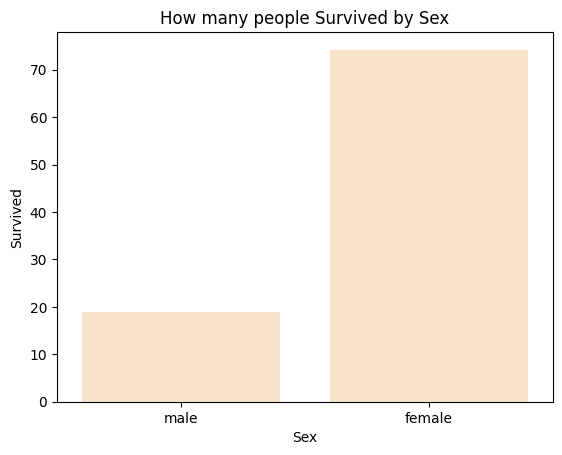

In [22]:
# How many people survived by Sex
sns.barplot(data = df_train_cleaned, x = "Sex", y = df_train_cleaned["Survived"]*100, errorbar= None, color= 'bisque' )
plt.title("How many people Survived by Sex")

Text(0.5, 1, 'Survival Rate w.r.to Class and Sex')

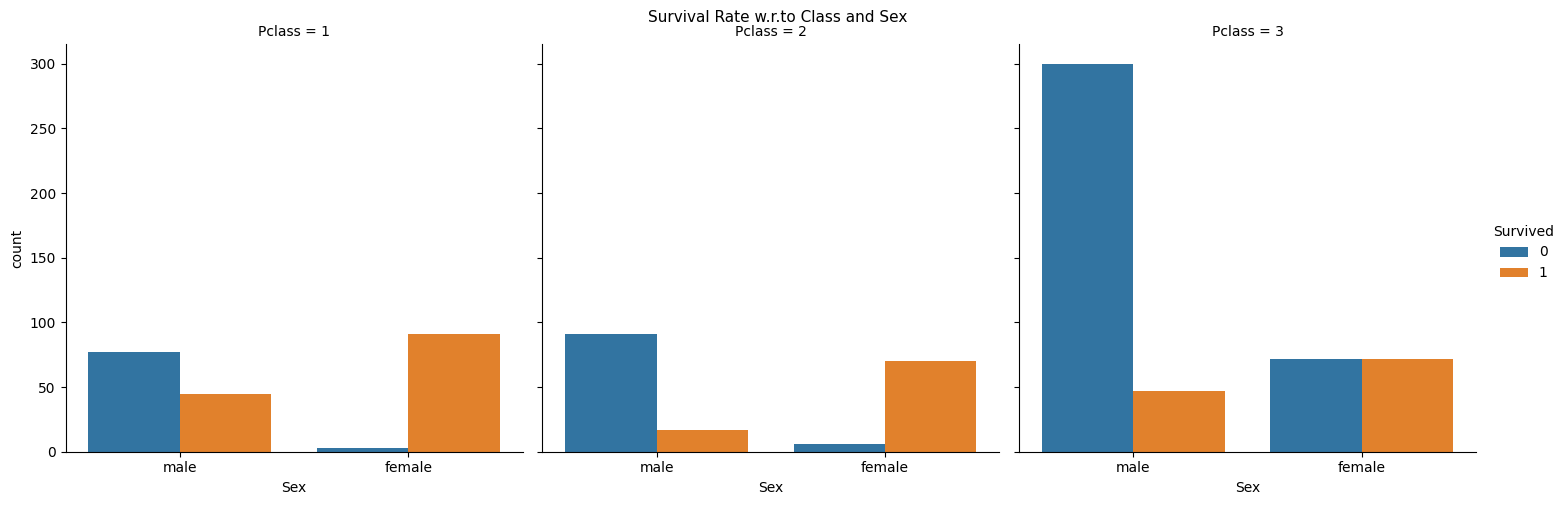

In [23]:
g = sns.catplot(df_train_cleaned, x = "Sex", hue ="Survived", col= "Pclass", kind= 'count', height= 5, aspect= 1 )
plt.suptitle("Survival Rate w.r.to Class and Sex", fontsize = 11, position = (0.5,1))

Text(0.5, 1.02, 'How many people with  different age groups are in each class')

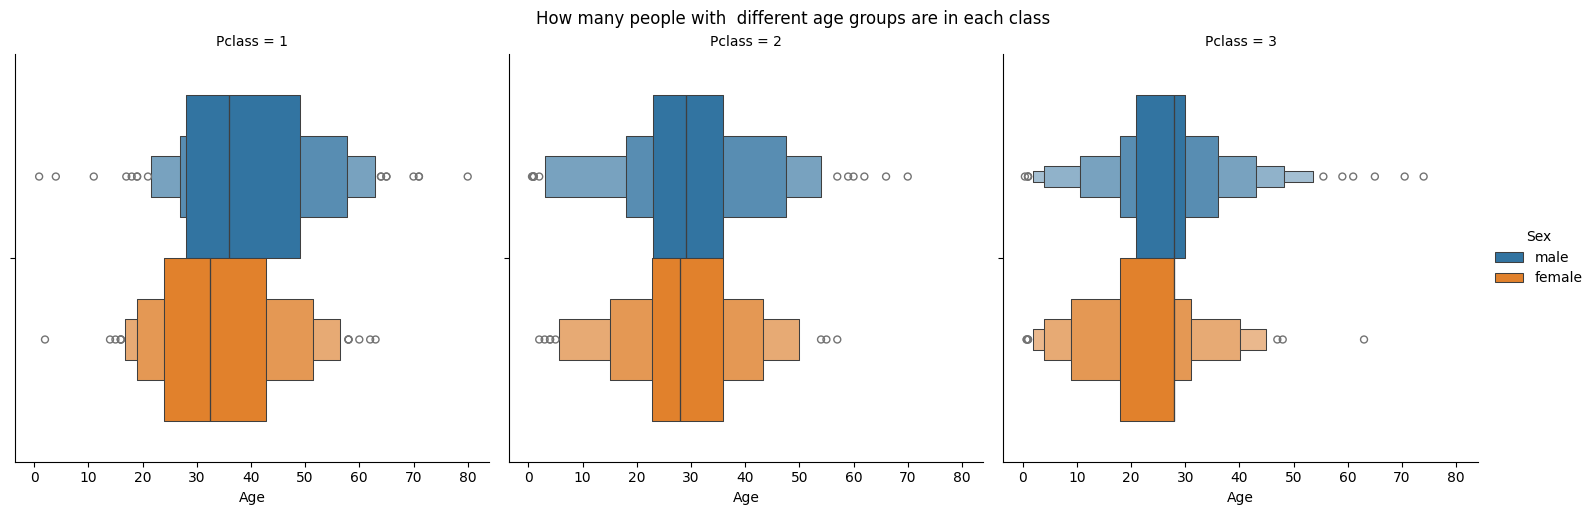

In [24]:
sns.catplot(df_train_cleaned, x ="Age", col= "Pclass", hue ="Sex", kind = "boxen")
plt.suptitle("How many people with  different age groups are in each class", y= 1.02)
# So Female has high survival rate then kids less than < 10 years

Text(0.5, 1, 'Siblings/Spouce survived w.r.to Class')

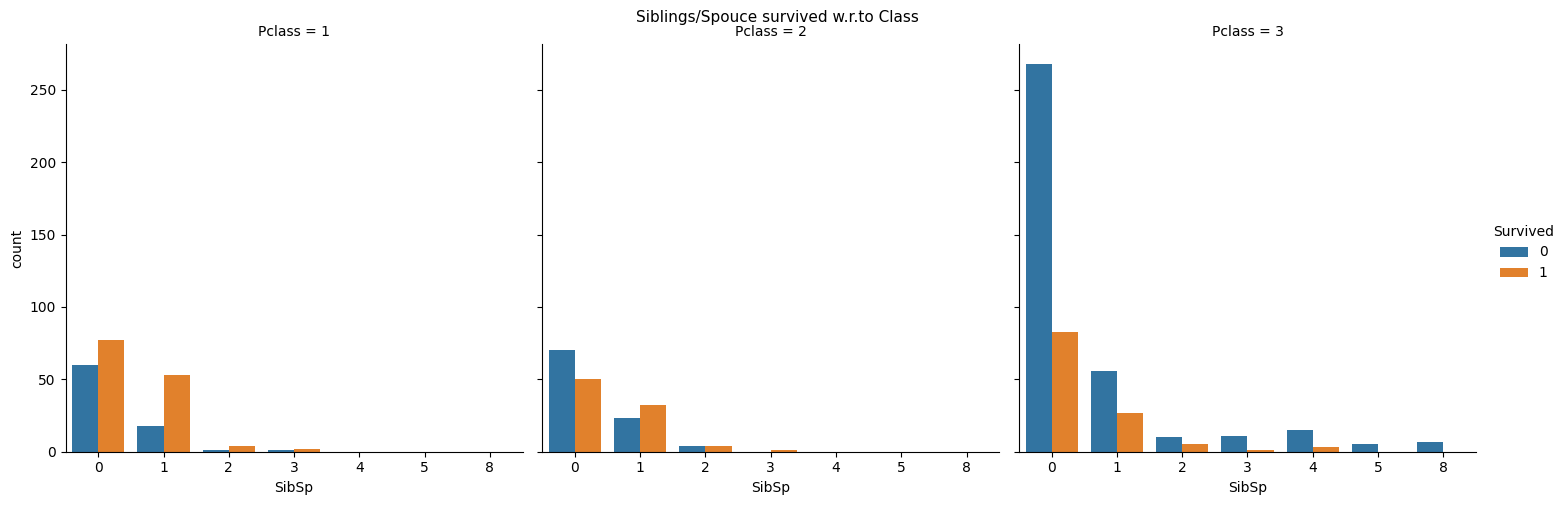

In [25]:

g = sns.catplot(df_train_cleaned, x = "SibSp", hue ="Survived", col= "Pclass", kind= 'count', height= 5, aspect= 1 )
plt.suptitle("Siblings/Spouce survived w.r.to Class", fontsize = 11, position = (0.5,1))
# First class Family has high survival rate

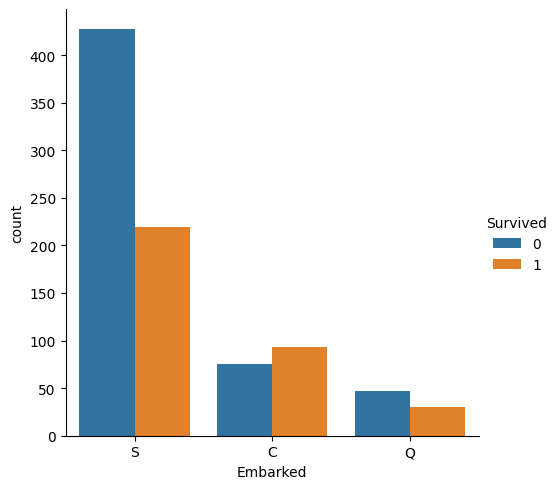

In [26]:
# Survival rate as per port of Entry
sns.catplot(df_train_cleaned, x = "Embarked", hue= "Survived", kind = "count")


#### **Feature Engineering**

In [27]:
#age less than <10 years for class 1 & 2
#family in first class #SibSP +#Parch +1 (its you)

def featuredf(df):
    df["Family"]= df["SibSp"] + df["Parch"] + 1
    condition = (df['Pclass'].isin([1, 2])) & (df['Age'] <= 10)
    df["Kids_10 in Class1_2"] = condition.astype('int64')
    df["Deck"] = df["Cabin"].str[0].fillna('U') # U for unkown
    # Women in 1st/2nd class
    df['Woman_Class1_2'] = ((df['Sex'] == 'female') & (df['Pclass'].isin([1, 2]))).astype(int)
    # Young males in 3rd class (worst survival group)
    df['YoungMale_Class3'] = ((df['Sex'] == 'male') & (df['Age'] < 18) & (df['Pclass'] == 3)).astype(int)

    
    return df
Train = featuredf(df_train_cleaned)
Test = featuredf(df_test_cleaned)


#### **Data Preparation**

In [28]:
# Splitting data
y_train_raw = Train["Survived"]
X_train_raw = Train.drop("Survived", axis = 1)
cat_col = X_train_raw.select_dtypes(include= "object").columns
numerical_col = X_train_raw.select_dtypes(include= ["int64", "float64"]).columns
preprocessor = ColumnTransformer (
    [("Categorical", OneHotEncoder(handle_unknown= "ignore", sparse_output =  False), cat_col ),
    ("Numerical", StandardScaler(), numerical_col)],

    verbose_feature_names_out= False
)
preprocessor.set_output(transform = "pandas")
X_train_encoder = preprocessor.fit_transform(X_train_raw)
X_test_encoder = preprocessor.transform(Test)


X_train, X_test, y_train,  y_test = train_test_split(X_train_encoder, y_train_raw, test_size= 0.3, random_state= 42)


/tmp/ipykernel_5938/3519868599.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_col = X_train_raw.select_dtypes(include= "object").columns


#### **Applying Models**

Decision Tree Accuracy 0.8208955223880597


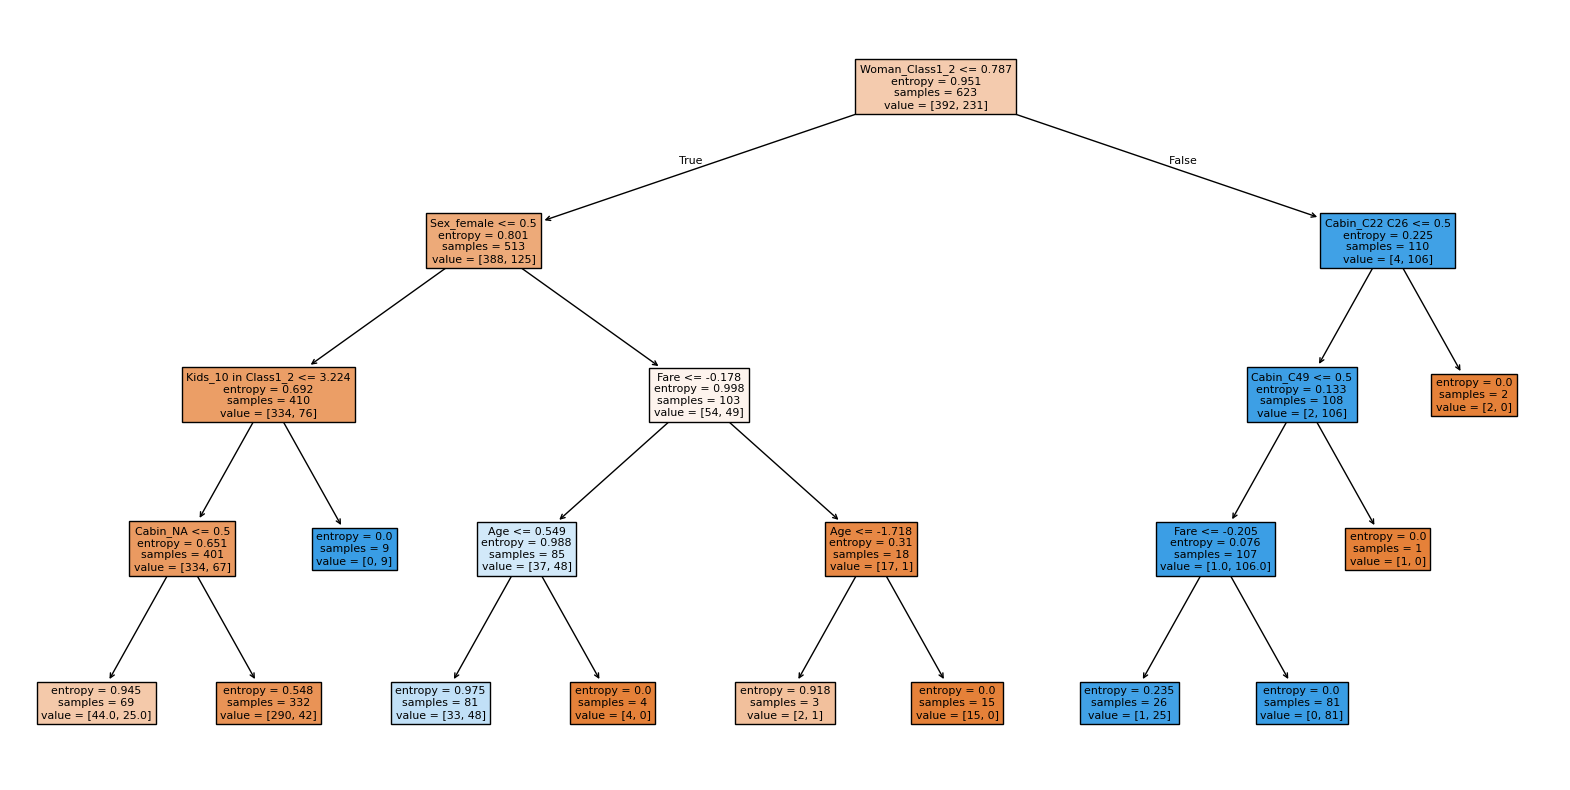

In [29]:
# Applying Decisiontree classification model
decision_tree = DecisionTreeClassifier(criterion= "entropy", max_depth= 4, random_state= 32)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
print("Decision Tree Accuracy", decision_tree.score(X_test, y_test) )
plt.figure(figsize=(20,10))
plot_tree(decision_tree, 
               feature_names=X_train.columns,
               filled=True)
plt.show()


#### **Support Vector Machines**

In [30]:
support_vector =SVC(C = 2.0, kernel = "rbf")
support_vector.fit(X_train,y_train)
support_vector.predict(X_test)
print("Support Vector Accuracy:", support_vector.score(X_test, y_test))

Support Vector Accuracy: 0.8097014925373134


#### **Ensemble Models**

In [31]:
#Random Forest
Random_Forest = RandomForestClassifier( random_state= 12)
Random_Forest.fit(X_train, y_train)
print("Support Vector Accuracy:", Random_Forest.score(X_test, y_test))

Support Vector Accuracy: 0.7649253731343284


In [32]:
#Adaboost
base_model = DecisionTreeClassifier(max_depth=5)

ensemble_adaboost = AdaBoostClassifier(estimator=base_model, n_estimators=100, learning_rate=0.01)
ensemble_adaboost.fit(X_train, y_train)

print(f"Accuracy of Adaboost:", ensemble_adaboost.score(X_test, y_test))

Accuracy of Adaboost: 0.8097014925373134


In [33]:
# XGBOOST
ensemble_xgboost = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=5,        
    learning_rate=0.01,   
    subsample=0.8,      
    colsample_bytree=0.8 
)
ensemble_xgboost.fit(X_train, y_train)
print(f"Accuracy of XGBoost Classifier:", ensemble_xgboost.score(X_test,y_test))

Accuracy of XGBoost Classifier: 0.7947761194029851


In [34]:
#CatBoost
model_cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    allow_writing_files=False,
    verbose=False
)

model_cat.fit(X_train, y_train)
print(f"CatBoost Accuracy: {model_cat.score(X_test, y_test)}")

CatBoost Accuracy: 0.8171641791044776


#### **Hyperparamteres tuning**

optimal depth for decision tree: {'max_depth': np.int64(11)}
Best cross-validation accuracy: 0.8218193548387097


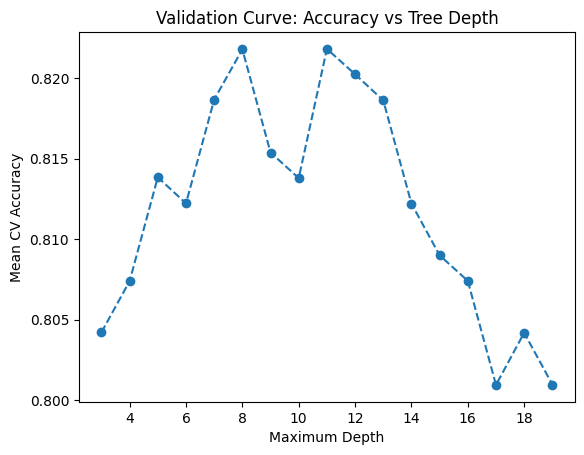

In [35]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 61)
parameters = { 'max_depth' : np.arange(3,20,1)} # Preprunning- cut the tree
decision_tree = DecisionTreeClassifier(criterion= "entropy", random_state= 32)
grid_search = GridSearchCV(estimator= decision_tree,param_grid= parameters,scoring= 'accuracy', cv = cv)
grid_search.fit(X_train, y_train)
print("optimal depth for decision tree:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
plotting = pd.DataFrame(grid_search.cv_results_)
depth = plotting["param_max_depth"]
score = plotting["mean_test_score"]
plt.plot( depth , score, marker = "o", ls = "--")
plt.xlabel('Maximum Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Validation Curve: Accuracy vs Tree Depth')
plt.show()



Best Alpha for Pruning: {'ccp_alpha': np.float64(0.008002585471280688)}
Best cross-validation accuracy: 0.8282838709677419


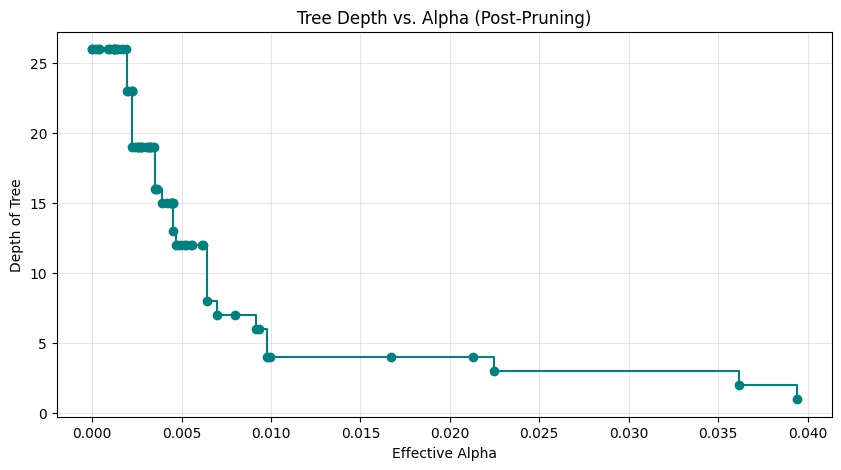

Training Accuracy of Decision tree 0.8523274478330658
Test Accuracy of Decision tree 0.8022388059701493


In [36]:
# Post Pruning
# 1. Get the path of alphas
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # These are the values to test

# We test the alphas we just extracted from the path
parameters = {'ccp_alpha': ccp_alphas}

grid_search_pruning = GridSearchCV(
    DecisionTreeClassifier(criterion="entropy", random_state=32),
    param_grid=parameters,
    cv=cv,
    scoring='accuracy'
)
grid_search_pruning.fit(X_train, y_train)

print("Best Alpha for Pruning:", grid_search_pruning.best_params_)
print("Best cross-validation accuracy:", grid_search_pruning.best_score_)

# Intrested to see depth vs ccp_alphas
clfs = []

# Loop through each alpha and train a UNIQUE tree
for a in ccp_alphas:
    clf = DecisionTreeClassifier(criterion="entropy", random_state=32, ccp_alpha=a)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last element because it's a "trivial" tree with only one node
clfs = clfs[:-1]
ccp_alphas_plot = ccp_alphas[:-1]

# Extract the depth of each tree
depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas_plot, depth, marker="o", drawstyle="steps-post", color='teal')
plt.xlabel("Effective Alpha")
plt.ylabel("Depth of Tree")
plt.title("Tree Depth vs. Alpha (Post-Pruning)")
plt.grid(True, alpha=0.3)
plt.show()   

print("Training Accuracy of Decision tree",grid_search_pruning.score(X_train, y_train))
print("Test Accuracy of Decision tree",grid_search_pruning.score(X_test, y_test))

#Depth -4

In [37]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 61)
parameters = {'kernel': ['linear','poly','rbf','sigmoid'],
              'C': [0.001,0.1,1,2,3,4,5,6,7,8,10],
              'degree': [3,4,5,8,10],
              'gamma': ['scale','auto']}

svm_gridsearch = SVC(random_state = 52)
grid_search_svm = GridSearchCV(estimator = svm_gridsearch, param_grid= parameters, scoring='accuracy')

grid_search_svm.fit(X_train, y_train)

print("Best Estimator:", grid_search_svm.best_estimator_)
print("Best Parameter:",grid_search_svm.best_params_)
print("Score:", grid_search_svm.best_score_)
#I am thinking model is overfitting
Train_accuracy = grid_search_svm.score(X_train, y_train)
Test_accuracy = grid_search_svm.score(X_test, y_test)
print("Training Accuracy:", Train_accuracy)
print("Testing Accuracy:", Test_accuracy)
print("Generalization Gap:", (Test_accuracy-Train_accuracy))
            

Best Estimator: SVC(C=7, random_state=52)
Best Parameter: {'C': 7, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Score: 0.8282709677419355
Training Accuracy: 0.8908507223113965
Testing Accuracy: 0.8059701492537313
Generalization Gap: -0.08488057305766517


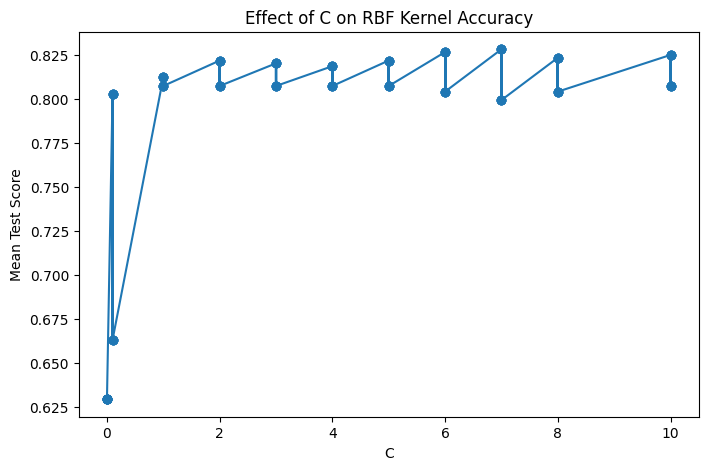

In [38]:
plotting_svm = pd.DataFrame(grid_search_svm.cv_results_)
rbf_results = plotting_svm[plotting_svm['param_kernel'] == 'rbf']

plt.figure(figsize=(8,5))
plt.plot(rbf_results['param_C'], rbf_results['mean_test_score'], marker='o')
plt.title("Effect of C on RBF Kernel Accuracy")
plt.xlabel("C")
plt.ylabel("Mean Test Score")
plt.show()
#set C= 2


In [39]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 41)

parameters = {
               "n_estimators" : [50,100,150, 200],
                "max_depth" : np.arange(0,10),
                "min_samples_split" : [2,3,4,5]
}


rf_gridsearch = RandomForestClassifier(random_state = 52)
grid_search_rf = GridSearchCV(estimator = rf_gridsearch, param_grid= parameters, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best Parameters",grid_search_rf.best_params_)
print("Accuracy score of Radom Forest classifier after hyper parameters tuning:", grid_search_rf.best_score_)




Best Parameters {'max_depth': np.int64(8), 'min_samples_split': 3, 'n_estimators': 50}
Accuracy score of Radom Forest classifier after hyper parameters tuning: 0.8442838709677419


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
80 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/base.py", line 1329, in wrapper
    estimator._validate_params()
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/base.py", line 492, in _validate_params
    validate_parameter_constraints(
  File

/tmp/ipykernel_5938/1408874425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='param_max_depth', y='mean_test_score', data=results_df, palette="viridis")


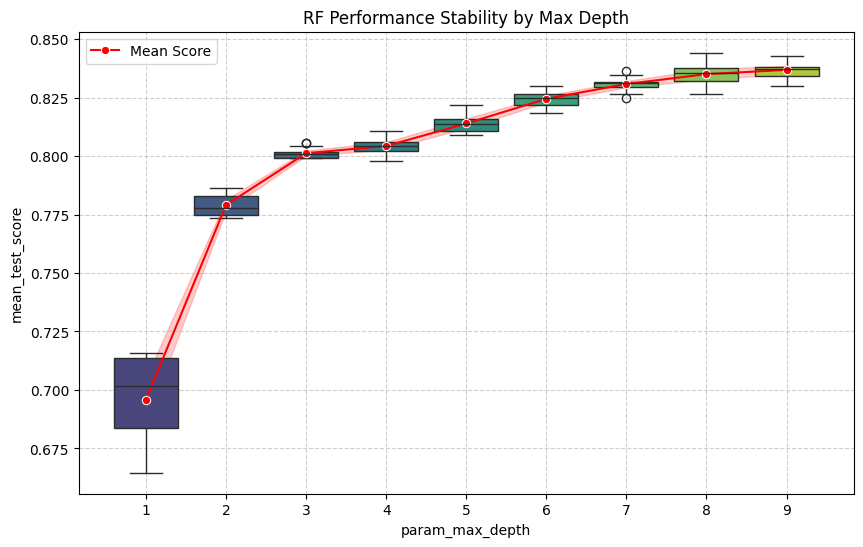

In [40]:
 
results_df = pd.DataFrame(grid_search_rf.cv_results_)

plt.figure(figsize=(10, 6))
sns.boxplot(x='param_max_depth', y='mean_test_score', data=results_df, palette="viridis")


sns.lineplot(x=results_df['param_max_depth'],
             y='mean_test_score', data=results_df, color='red', marker='o', label='Mean Score')

plt.title('RF Performance Stability by Max Depth')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show();

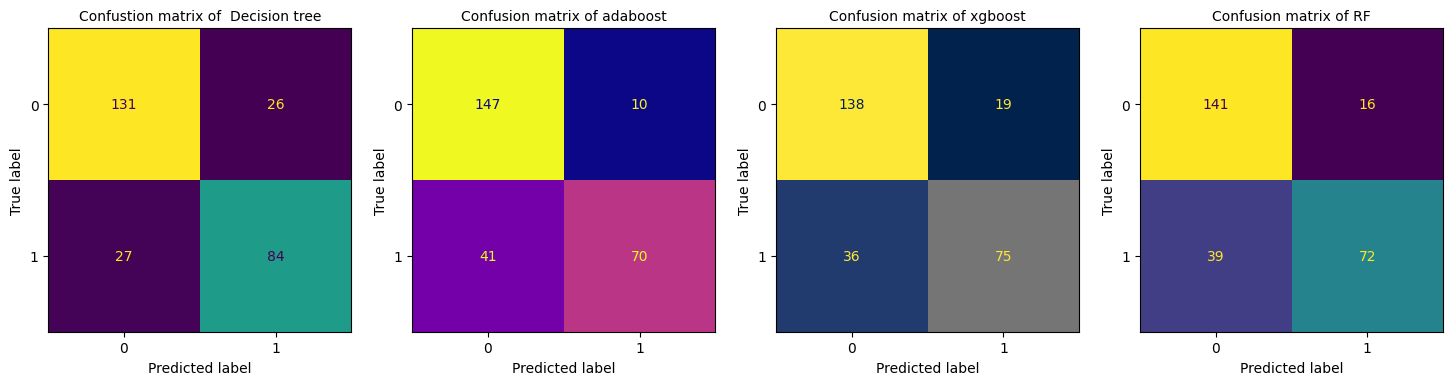

In [41]:

fig, ax = plt.subplots(1, 4, figsize = (18,10))

ConfusionMatrixDisplay.from_estimator(grid_search_pruning, X_test, y_test, ax = ax[0],colorbar=False)
ax[0].set_title("Confustion matrix of  Decision tree", fontsize=10)

ConfusionMatrixDisplay.from_estimator(ensemble_adaboost, X_test, y_test, ax = ax[1],cmap= "plasma",colorbar=False)
ax[1].set_title("Confusion matrix of adaboost", fontsize=10)

ConfusionMatrixDisplay.from_estimator(ensemble_xgboost, X_test, y_test, ax = ax[2],cmap = "cividis",colorbar=False)
ax[2].set_title("Confusion matrix of xgboost", fontsize=10)

ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_test, y_test, ax = ax[3],colorbar=False)
ax[3].set_title("Confusion matrix of RF", fontsize=10)

plt.show();

In [42]:
print("Xgboost classification report",classification_report(y_test, ensemble_xgboost.predict(X_test)))
print("Adaboost classification report",classification_report(y_test, ensemble_adaboost.predict(X_test)))
print("Desision Tree classification report",classification_report(y_test, grid_search_pruning.predict(X_test)))
print("RF classification report",classification_report(y_test, grid_search_rf.predict(X_test)))

Xgboost classification report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268

Adaboost classification report               precision    recall  f1-score   support

           0       0.78      0.94      0.85       157
           1       0.88      0.63      0.73       111

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268

Desision Tree classification report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       157
           1       0.76      0.76      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.

#### **Testing on Test Dataset**

In [43]:
Final_model = DecisionTreeClassifier(max_depth=4, criterion="entropy", ccp_alpha= 0.008002585471280688, random_state=32)
Final_model.fit(X_train,y_train)  #Final model Fit on Training data
y_test_predict = Final_model.predict(X_test_encoder) # Predict on Testing data, Here X_test_encoder already scaled

In [44]:
file_input = "test.csv"
Test_raw = pd.read_csv(file_input)
Test_raw
predictions = pd.DataFrame( {"PassengerId": Test_raw["PassengerId"], "Predictions" : y_test_predict})
predictions.head(10)

,PassengerId,Predictions
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
